<a href="https://colab.research.google.com/github/aayush1036/RegressionAlgorithms/blob/master/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GradientDescent

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from GradientDescent import Descent, Preprocess

# Linear Regression

In [3]:
linear_data = pd.read_csv('https://raw.githubusercontent.com/aayush1036/data/main/linear_multivariate_gradient_descent.csv')
linear_data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
linear_data.set_index(['Year'],inplace=True)

In [5]:
linear_data.head()

,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,,,,,,,,,,
1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [6]:
X_linear = linear_data.iloc[:,:-1]
y_linear = linear_data.iloc[:,-1].values.reshape(-1,1)

In [7]:
X_scaler_linear = Preprocess(X_linear)
X1_linear = X_scaler_linear.transform(add_ones=True)
y_scaler_linear = Preprocess(y_linear)
y_norm = y_scaler_linear.transform(add_ones=False)

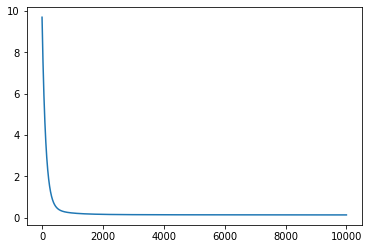

In [8]:
gd_linear = Descent(X1_linear, y_norm,epoch=10000,alpha=0.001)
pastCost,pastTheta, stopEpoch = gd_linear.fit()
plt.plot(pastCost)

In [9]:
print(gd_linear.summary)

                                    Values
Skewess(residuals)   [0.09385026056425166]
Kurtosis(residuals)   [1.1139100843755498]
Jarque Bera Coef                   16.3757
Jarque Bera p-value            0.000278013
R Squared                         0.732656
Adjusted R squared                0.723654
MSE                               0.267344


In [10]:
data_logistic = pd.read_csv('https://raw.githubusercontent.com/aayush1036/data/main/logistic_gradient_descent.csv')
data_logistic.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
X_logistic = data_logistic.iloc[:,:-1]
y_logistic = data_logistic.iloc[:,-1].values.reshape(-1,1)

In [12]:
X_scaler_logistic = Preprocess(X_logistic)
X1_logistic = X_scaler_logistic.transform()

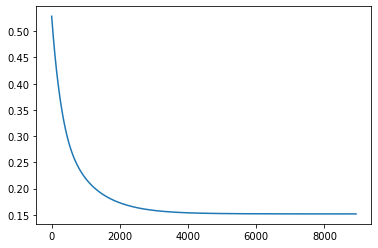

In [16]:
gd_logistic = Descent(X1_logistic, y_logistic,epoch=10000,method='logistic',alpha=0.01)
pastCost,pastTheta, stopEpoch = gd_logistic.fit()
plt.plot(pastCost)

In [17]:
print(gd_logistic.summary)

                                    Values
Skewess(residuals)   [-0.4854510291391381]
Kurtosis(residuals)   [3.7664566445142045]
Jarque Bera Coef                   191.002
Jarque Bera p-value                      0
Precision                         0.837989
Recall                            0.909091
F1-Score                          0.872093
